# Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
% matplotlib inline

/home/sudhir/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import data set

In [2]:
train = pd.read_csv('train.csv',na_values=-1)
test = pd.read_csv('test.csv',na_values=-1)

# Explore data set

In [4]:
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

train.head(3).T

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


,0,1,2
id,7.000000,9.000000,13.000000
target,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000
ps_ind_02_cat,2.000000,1.000000,4.000000
ps_ind_03,5.000000,7.000000,9.000000
ps_ind_04_cat,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000
ps_ind_07_bin,1.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

# Traget varaiable

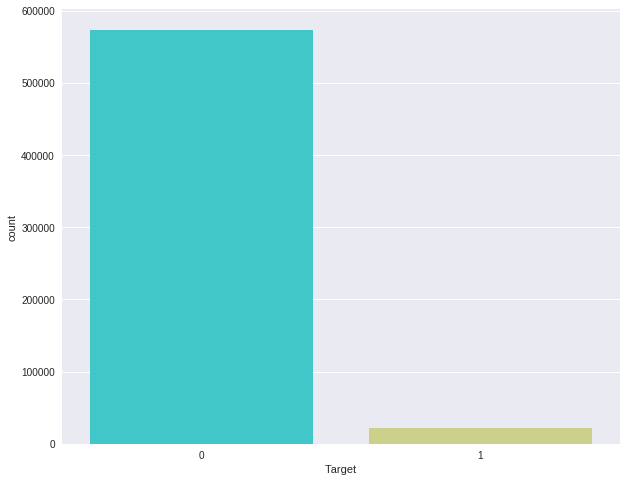

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

The 'target' variable in imbalanced 

"""Values of -1 indicate that the feature was missing from the observation. 
The target columns signifies whether or not a claim was filed for that policy holder.""

### Missing value is data set

In [38]:
k= pd.DataFrame()
k['train']=train.isnull().sum()
k['test'] = test.isnull().sum()
k

,train,test
id,0,0.0
target,0,NaN
ps_ind_01,0,0.0
ps_ind_02_cat,0,0.0
ps_ind_03,0,0.0
ps_ind_04_cat,0,0.0
ps_ind_05_cat,0,0.0
ps_ind_06_bin,0,0.0
ps_ind_07_bin,0,0.0
ps_ind_08_bin,0,0.0


Missing value in test train data set are in same propotion and same column

In [33]:
train['ps_car_14'].isnull().sum()

42620

In [39]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [40]:
missing_value(train)
missing_value(test)

In [52]:
def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        print(df[i].unique())
uniq(train)


 Unique value of "id" is "595212" 
[      7       9      13 ..., 1488017 1488021 1488027]

 Unique value of "target" is "2" 
[0 1]

 Unique value of "ps_ind_01" is "8" 
[2 1 5 0 4 3 6 7]

 Unique value of "ps_ind_02_cat" is "4" 
[ 2.  1.  4.  3.]

 Unique value of "ps_ind_03" is "12" 
[ 5  7  9  2  0  4  3  1 11  6  8 10]

 Unique value of "ps_ind_04_cat" is "2" 
[ 1.  0.]

 Unique value of "ps_ind_05_cat" is "7" 
[ 0.  1.  4.  3.  6.  5.  2.]

 Unique value of "ps_ind_06_bin" is "2" 
[0 1]

 Unique value of "ps_ind_07_bin" is "2" 
[1 0]

 Unique value of "ps_ind_08_bin" is "2" 
[0 1]

 Unique value of "ps_ind_09_bin" is "2" 
[0 1]

 Unique value of "ps_ind_10_bin" is "2" 
[0 1]

 Unique value of "ps_ind_11_bin" is "2" 
[0 1]

 Unique value of "ps_ind_12_bin" is "2" 
[0 1]

 Unique value of "ps_ind_13_bin" is "2" 
[0 1]

 Unique value of "ps_ind_14" is "5" 
[0 1 2 3 4]

 Unique value of "ps_ind_15" is "14" 
[11  3 12  8  9  6 13  4 10  5  7  2  0  1]

 Unique value of "ps_ind_16_bin" 

[1 2 4 3 0 5 6]

 Unique value of "ps_calc_06" is "11" 
[10  9  7  6  8  5  4  3  2  1  0]

 Unique value of "ps_calc_07" is "10" 
[1 5 3 2 4 6 0 7 8 9]

 Unique value of "ps_calc_08" is "11" 
[10  8 11  6  9  7  5 12  4  3  2]

 Unique value of "ps_calc_09" is "8" 
[1 2 4 3 0 5 6 7]

 Unique value of "ps_calc_10" is "26" 
[ 5  7  2 12  8 10 13 11  9 18  4 15  6 14 16  3  1 17  0 21 19 20 22 23 25
 24]

 Unique value of "ps_calc_11" is "20" 
[ 9  3  4  2  7  6  5 10  8  1  0 13 11 12 14 15 16 19 17 18]

 Unique value of "ps_calc_12" is "11" 
[ 1  2  0  5  3  4  6  7  8  9 10]

 Unique value of "ps_calc_13" is "14" 
[ 5  1  7  4  0  3  6  2  8 10  9 11 12 13]

 Unique value of "ps_calc_14" is "24" 
[ 8  9  7  3 10  6  5 11  4 14 13 12 16  2  1 15 17  0 19 20 18 22 21 23]

 Unique value of "ps_calc_15_bin" is "2" 
[0 1]

 Unique value of "ps_calc_16_bin" is "2" 
[1 0]

 Unique value of "ps_calc_17_bin" is "2" 
[1 0]

 Unique value of "ps_calc_18_bin" is "2" 
[0 1]

 Unique value of "ps_c

The unique value of "ps_car_11_cat" is maximum in the data set is 104

### Convert variable into categorical type

In [63]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null category
ps_ind_01         595212 non-null category
ps_ind_02_cat     595212 non-null category
ps_ind_03         595212 non-null category
ps_ind_04_cat     595212 non-null category
ps_ind_05_cat     595212 non-null category
ps_ind_06_bin     595212 non-null category
ps_ind_07_bin     595212 non-null category
ps_ind_08_bin     595212 non-null category
ps_ind_09_bin     595212 non-null category
ps_ind_10_bin     595212 non-null category
ps_ind_11_bin     595212 non-null category
ps_ind_12_bin     595212 non-null category
ps_ind_13_bin     595212 non-null category
ps_ind_14         595212 non-null category
ps_ind_15         595212 non-null category
ps_ind_16_bin     595212 non-null category
ps_ind_17_bin     595212 non-null category
ps_ind_18_bin     595212 non-null category
ps_reg_01         595212 non-nul

The memory of dataset redused from 'memory usage: 267.9 MB' to 'memory usage: 53.4 MB'

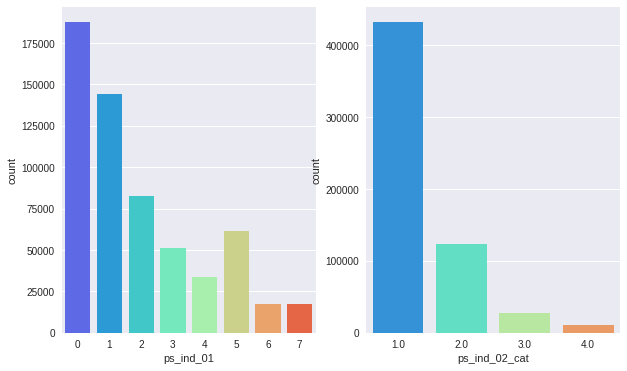

In [76]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(train['ps_ind_01'],palette='rainbow')
plt.subplot(122)
sns.countplot(train['ps_ind_02_cat'],palette='rainbow')

In [83]:
#split data set
X = train.drop(['target','id'],axis=1)
y = train['target']
x_test = test.drop('id',axis=1)
xtr,xvl,ytr,yvl = train_test_split(X,y,test_size=0.3,random_state=192)

In [79]:
#Modelling
lr = LogisticRegression(max_iter=1000,verbose = 1,)
lr.fit(xtr,ytr)

y_lr = lr.predict(xvl)

[LibLinear]

In [80]:
confusion_matrix(yvl,y_lr)

array([[172074,      0],
       [  6490,      0]])

In [86]:
#Predict for unsen data set
y_pred = lr.predict_proba(x_test)
submit = pd.DataFrame({'id':test['id'],'target':y_pred[:,1]})
submit.to_csv('lr_porto.csv',index=False) 

In [85]:
y_pred

array([[ 0.97146408,  0.02853592],
       [ 0.97224848,  0.02775152],
       [ 0.97029032,  0.02970968],
       ..., 
       [ 0.97103917,  0.02896083],
       [ 0.97724264,  0.02275736],
       [ 0.96859154,  0.03140846]])